In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
# Data visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# About Dataset
### Data Science Job Salaries Dataset contains 11 columns, each are:

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* employment_type: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
* company_location: The country of the employer's main office or contracting branch
* company_size: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [3]:
# Import data and display top 5 rows
address= '/kaggle/input/data-science-salaries-2023/ds_salaries.csv'
df = pd.read_csv(address)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Check for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
# Investigate number of unique values by column (cardinality)
columns = df.columns
n_unique = [df[col].nunique() for col in columns]
pd.Series(n_unique, index=columns)

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [6]:
# How is the data split across work years?
print(f"2020 data entries: {(df['work_year']==2020).sum()}")
print(f"2021 data entries: {(df['work_year']==2021).sum()}")
print(f"2022 data entries: {(df['work_year']==2022).sum()}")
print(f"2023 data entries: {(df['work_year']==2023).sum()}")

2020 data entries: 76
2021 data entries: 230
2022 data entries: 1664
2023 data entries: 1785


* As most of the data is based in 2022 and 2023. Any trends over time may be inaccurate that include 2020 and 2021 due to insufficient data.

## Mean USD salary analysis based on factors such as:
* Job title
* Work year
* Company size
* Employee experience level
* Employee residence
* Employment type
* Remote working ratio

In [7]:
# Which job titles receive the highest mean USD salaries?
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[0:10]

job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 [Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000')])

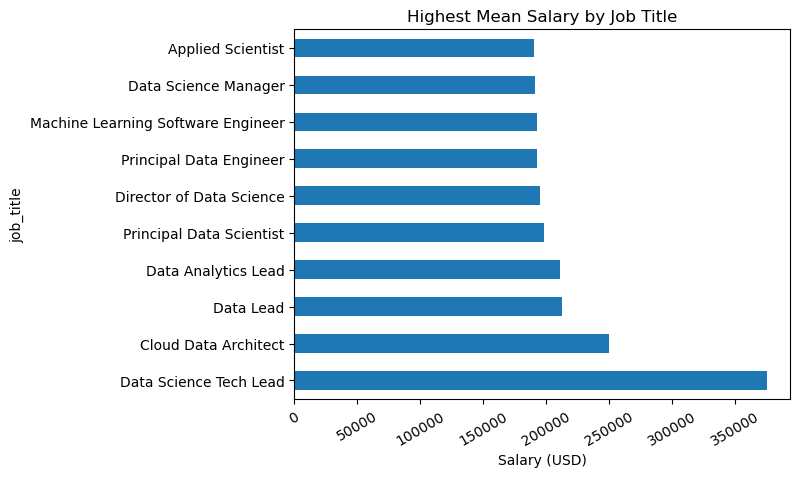

In [8]:
# Plot of highest mean USD salary by job title
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[0:10].plot(kind='barh')
plt.title('Highest Mean Salary by Job Title')
plt.xlabel('Salary (USD)')
plt.xticks(rotation=30)

In [9]:
# How many employees hold the top two paid positions?
highest_paid_jobs = ['Cloud Data Architect', 'Data Science Tech Lead']
df[df['job_title'].isin(highest_paid_jobs)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2359,2022,SE,FT,Data Science Tech Lead,375000,USD,375000,US,50,US,L
3063,2021,SE,FT,Cloud Data Architect,250000,USD,250000,US,50,US,L


* Most of the top 10 data industry jobs have a mean salary of around USD200K
* Cloud Architect and Data Science Tech Lead pay the highest salaries of USD250K and USD375K respectively. There is only one entry for each of these job titles so these could be **outliers**. More data on these job_titles would be required to improve the mean salary reliability.

In [10]:
# How has mean USD salary changed over from 2020 to 2023?
df.groupby('work_year')['salary_in_usd'].mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Mean Salary (USD)')

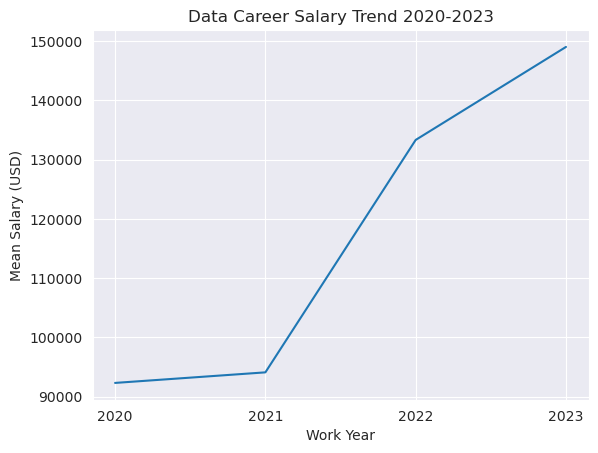

In [11]:
# Line plot of data industry salaries from 2020-2023
sns.set_style(style='darkgrid')
sns.lineplot(df.groupby('work_year')['salary_in_usd'].mean())
plt.title('Data Career Salary Trend 2020-2023')
plt.xticks(ticks=[2020,2021,2022,2023])
plt.xlabel('Work Year')
plt.ylabel('Mean Salary (USD)')

* Clear positive trend representing salary growth from 2020 - 2023
* Biggest jump in mean salary is from 2021 (USD 94,087), to 2022 (USD 133,338), representing an 41.7% increase.
* Due to lack of data in 2020 and 2021, the most notable increase is from 2022 to 2023, where we have sufficient data to evidence an increase.
* Only 4 years of data are used. Trend accuracy could be further validated if data was available for more work years.

In [12]:
# Which company size pays the highest salary?
df.groupby('company_size')['salary_in_usd'].mean()

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Mean Salary (USD)')

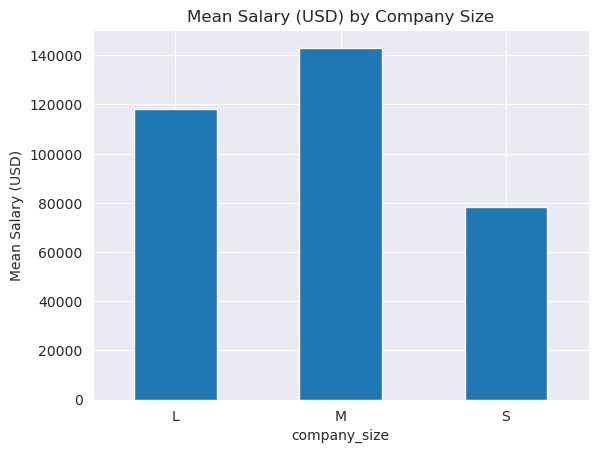

In [13]:
# Plot of mean salary (USD) by company size
df.groupby('company_size')['salary_in_usd'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Mean Salary (USD) by Company Size')
plt.ylabel('Mean Salary (USD)')

In [14]:
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

([<matplotlib.patches.Wedge at 0x7c0cdea26d10>,
 [Text(-0.5251036315600717, 0.2902863691640109, 'M'),
  Text(0.48511421780981473, -0.35307817219246446, 'L'),
  Text(0.5953817012314708, -0.07430094103522246, 'S')],
 [Text(-1.0939658990834826, 0.6047632690916894, '83.9%'),
  Text(1.010654620437114, -0.7355795254009677, '12.1%'),
  Text(1.2403785442322308, -0.15479362715671346, '4.0%')])

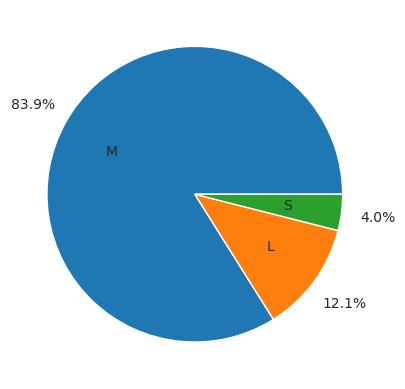

In [15]:
# Pie chart comparision of different company sizes.
labels = ['M', 'L', 'S']
sizes = [3143, 454, 148]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.25, labeldistance=.6)

* Most employees work in medium size firms with between 50 and 250 employees.
* These medium size firms pay the highest mean salary, followed by large firms (250+ employees), and finally small firms (-50 employees).
* Limited available data for small and large size companies may mean the mean salary is not as accurate as it is for medium size firms.

### Experience level
* EN = Entry-level / Junior 
* MI = Mid-level / Intermediate 
* SE Senior-level / Expert 
* EX Executive-level / Director

Text(0.5, 0, 'Experience Level')

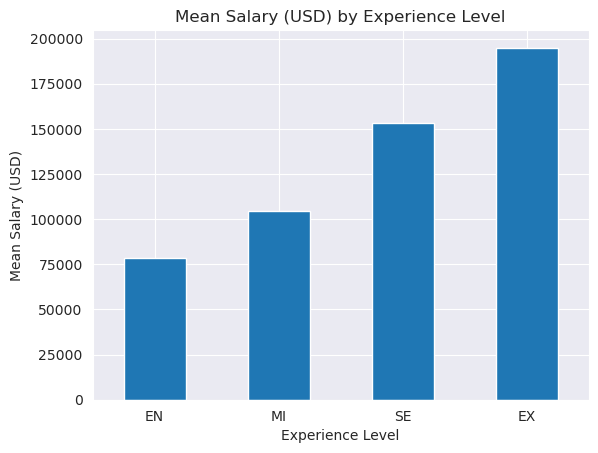

In [16]:
# How does salary vary by experience level?
df.groupby('experience_level')['salary_in_usd'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Mean Salary (USD) by Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.xlabel('Experience Level')

* Unsuprisingly, the more senior an employee, the higher their salary.

Text(0.5, 0, 'Employee Residence')

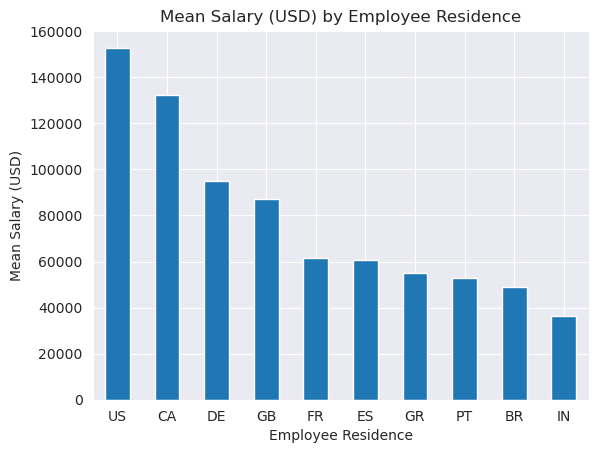

In [17]:
# How does mean salary vary by the top 10 most common employee residence locations?
top10_er = list(df.employee_residence.value_counts()[0:10].index)

df[df['employee_residence'].isin(top10_er)].groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Mean Salary (USD) by Employee Residence')
plt.ylabel('Mean Salary (USD)')
plt.xlabel('Employee Residence')

In [18]:
df[df['employee_residence'].isin(top10_er)].groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)

employee_residence
US    152822.011651
CA    132222.905882
DE     94772.250000
GB     86988.323353
FR     61492.500000
ES     60463.350000
GR     55136.062500
PT     53059.000000
BR     48927.111111
IN     36218.450704
Name: salary_in_usd, dtype: float64

In [19]:
# How frequently do different company locations occur?
df.company_location.value_counts()[0:10]

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: company_location, dtype: int64

* Almost all recorded companies are based in the US.
* Mean salary is largely depending on geographic location.
* North American based employees receive the highest mean salary, followed by European countries, followed by the rest of the world.
* US based employees receive a mean salary of USD152k, compared to Germany (The highest paid European employees) at USD94772K. This is a substantial difference of around 60%.

In [20]:
# How does salary vary by employment type?
df.groupby('employment_type')['salary_in_usd'].mean().sort_values()

employment_type
PT     39533.705882
FL     51807.800000
CT    113446.900000
FT    138314.199570
Name: salary_in_usd, dtype: float64

In [21]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

As almost all of the data relates to full time employment. There is insufficient data to accurately compare salaries across varying employment types.

In [22]:
# How does salary vary by remote working ratio?
df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values()

remote_ratio
50      78400.687831
100    136481.452830
0      144316.202288
Name: salary_in_usd, dtype: float64

(array([0, 1, 2]), [Text(0, 0, '50'), Text(1, 0, '100'), Text(2, 0, '0')])

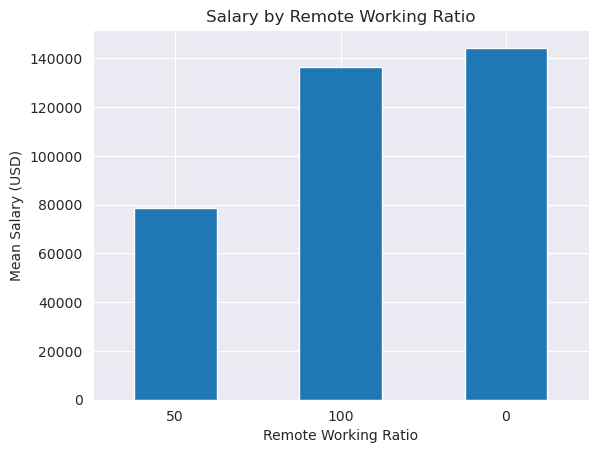

In [23]:
df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values().plot(kind='bar')
plt.title('Salary by Remote Working Ratio')
plt.xlabel('Remote Working Ratio')
plt.ylabel('Mean Salary (USD)')
plt.xticks(rotation=0)

In [24]:
df['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

* Most entries are 0, which means less than 20% of their work is remote. Second most popular is remote workers (80% or more)
* Only 189 workers work between 20% and 80% remote.
* Full time office workers earn on average USD8K more than remote workers.
* Hybrid workers (20%-80% remote) have the lowest mean salary of around USD80K but the data in this category is limited.